<a href="https://colab.research.google.com/github/Susovan88/Machine_Learning/blob/main/Linear%20Regression/Algerian_forest_fires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [391]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [392]:
df=pd.read_csv('/content/Algerian_forest_fires_dataset_UPDATE.csv',header=1)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [393]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


**Clean Missing values**

In [394]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [395]:
df=df.dropna().reset_index(drop=True)
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [396]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [397]:
df=df.drop(122).reset_index(drop=True)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
239,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
240,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
241,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


 **Change datatype into int or float**


In [398]:
df.loc[:122,'Region']=0
df.loc[122:,'Region']=1

df['Region']=df["Region"].astype('int')  ## change datatype into int
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [399]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4    RH          243 non-null    object
 5    Ws          243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.6+ KB


In [400]:
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [401]:
df[['day','month','year','Temperature','RH','Ws']]=df[['day','month','year','Temperature','RH','Ws']].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


In [402]:
[feature for feature in df.columns if df[feature].dtype=='O']

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [403]:
for fr in [feature for feature in df.columns if df[feature].dtype=='O']:
  if fr !='Classes':
    df[fr]=df[fr].astype("float")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [404]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [405]:
df.to_csv('Algerian_forest_fires_dataset_cleaned.csv',index=False) ## to save the clean dataset

# EDA

In [406]:
df_copy=df.drop(columns=['day','month','year'])
df_copy

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [407]:
df_copy['Classes'].value_counts()

,count
Classes,
fire,131
not fire,101
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


In [408]:
df_copy['Classes']=df_copy['Classes'].apply(lambda x:x.strip())
df_copy['Classes'].value_counts()

,count
Classes,
fire,137
not fire,106


In [409]:
# df_copy[df_copy['Classes']=='fire']=1
# df_copy[df_copy['Classes']=='not fire']=0
## or,
df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not fire'),0,1)

df_copy['Classes'].value_counts()

,count
Classes,
1,137
0,106


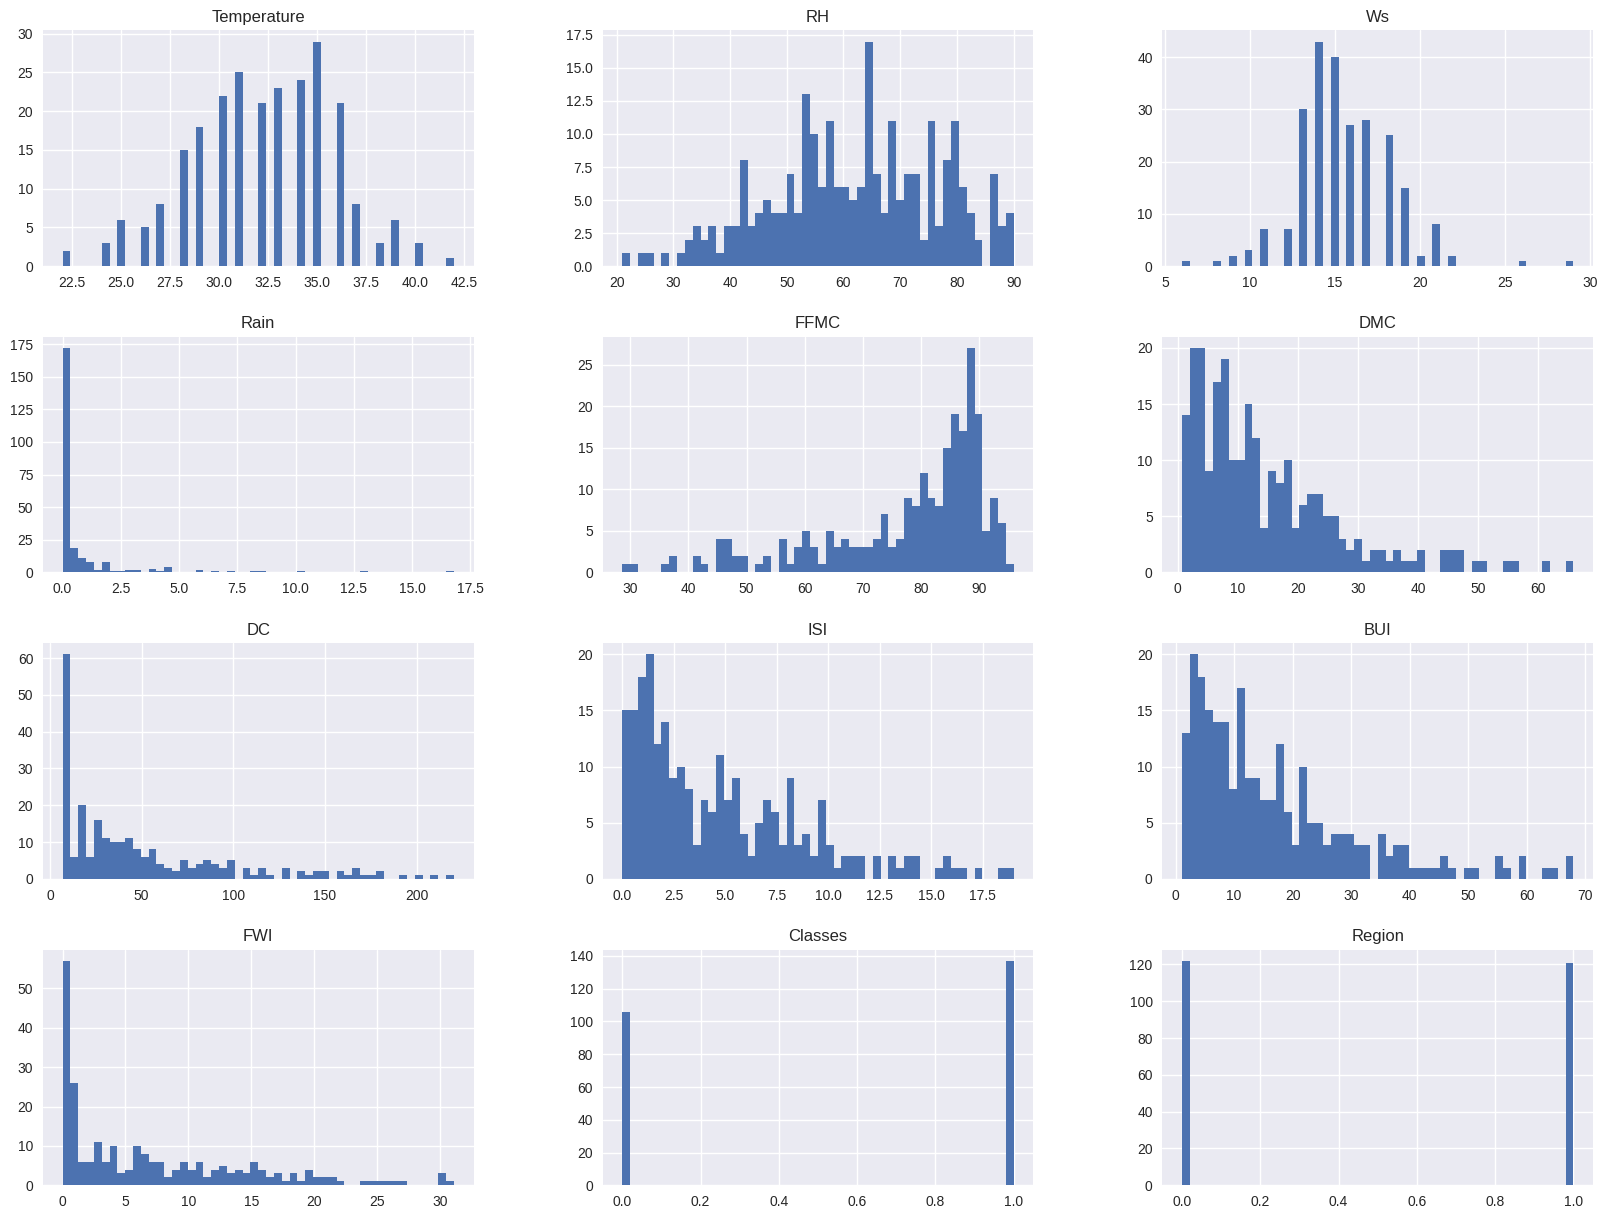

In [410]:
## ploting
plt.style.use('seaborn-v0_8')
df_copy.hist(bins=50,figsize=(20,15))
plt.show()

In [411]:
precentage_classes=df_copy['Classes'].value_counts(normalize=True)*100
precentage_classes

,proportion
Classes,
1,56.378601
0,43.621399


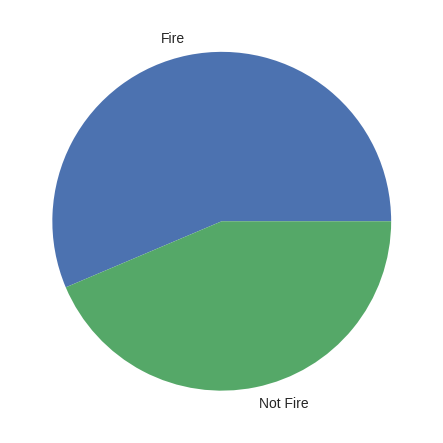

<Figure size 2000x1500 with 0 Axes>

In [412]:
plt.pie(precentage_classes,labels=['Fire','Not Fire'])
plt.figure(figsize=(20,15))
plt.show()

In [413]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

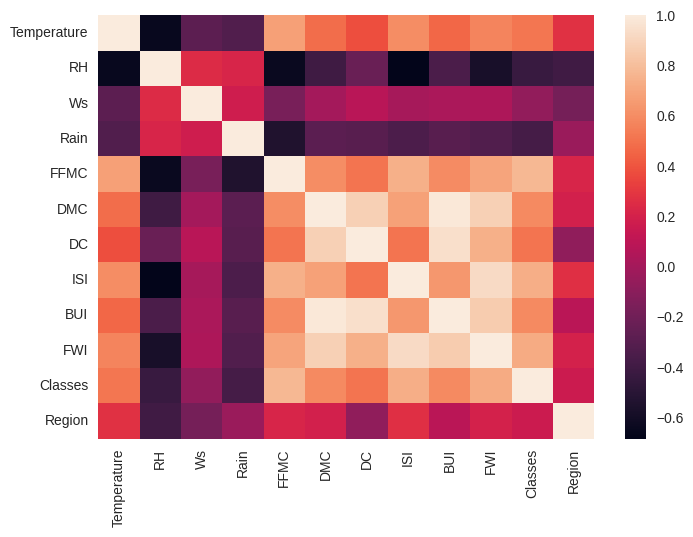

In [414]:
sns.heatmap(df_copy.corr())

<Axes: ylabel='FWI'>

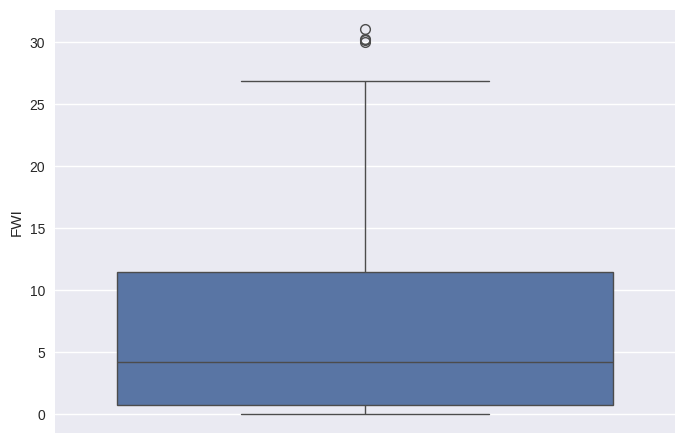

In [415]:
sns.boxplot(df['FWI'])

/tmp/ipython-input-3378598648.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['Classes']=np.where(df_temp['Classes'].str.contains('not fire'),'Not Fire',"Fire")


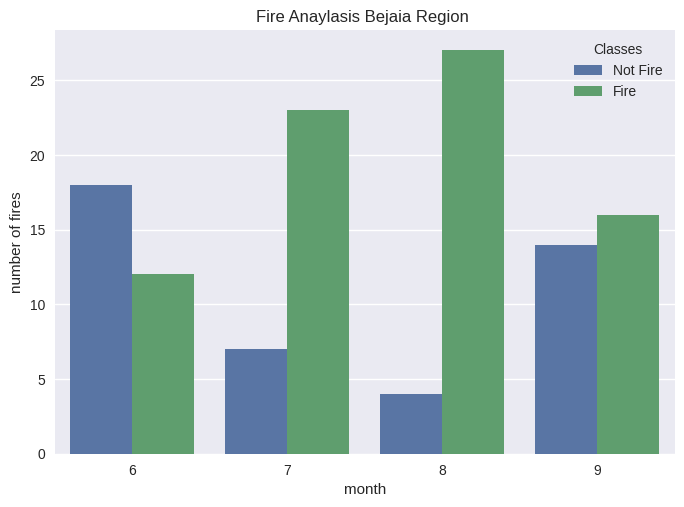

In [416]:
df_temp=df[df['Region']==1]
df_temp['Classes']=np.where(df_temp['Classes'].str.contains('not fire'),'Not Fire',"Fire")
sns.countplot(x=df_temp["month"],hue=df_temp['Classes'],data=df_temp)
plt.ylabel('number of fires')
plt.xlabel('month')
plt.title('Fire Anaylasis Bejaia Region ')
plt.show()

/tmp/ipython-input-1574834461.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['Classes']=np.where(df_temp['Classes'].str.contains('not fire'),'Not Fire',"Fire")


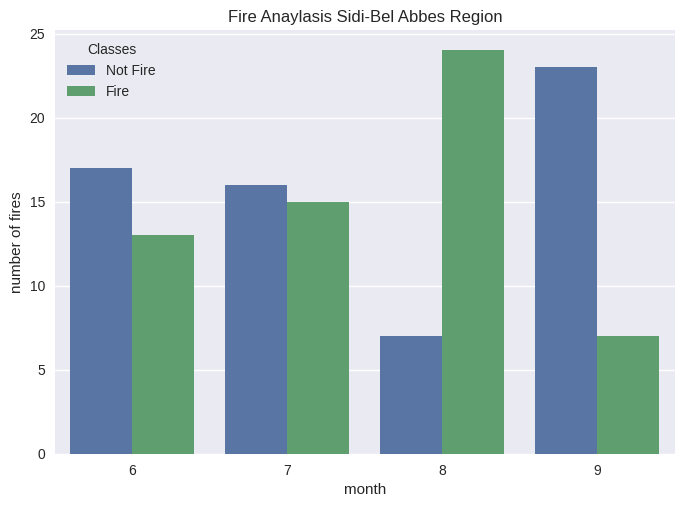

In [417]:
df_temp=df[df['Region']==0]
df_temp['Classes']=np.where(df_temp['Classes'].str.contains('not fire'),'Not Fire',"Fire")
sns.countplot(x=df_temp["month"],hue=df_temp['Classes'],data=df_temp)
plt.ylabel('number of fires')
plt.xlabel('month')
plt.title('Fire Anaylasis Sidi-Bel Abbes Region')
plt.show()

## Model Training

In [418]:
df.drop(['day',	"month",	"year"],axis=1,inplace=True)
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [419]:
df['Classes'].value_counts()

,count
Classes,
1,137
0,106


In [420]:
from sklearn.model_selection import train_test_split

x=df.drop('FWI',axis=1)
y=df[['FWI']]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

print(x_train.shape,x_test.shape)



(194, 11) (49, 11)


In [421]:
from sklearn.feature_selection import VarianceThreshold
var=VarianceThreshold(threshold=0.05)
var.fit(x_train)
print(var.variances_,"\n",x_train.columns[var.get_support()])

[1.35882931e+01 2.24393905e+02 8.25765225e+00 3.55079817e+00
 2.26398093e+02 1.57483329e+02 2.12005995e+03 1.62184993e+01
 2.03827952e+02 2.46173876e-01 2.50000000e-01] 
 Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'Classes', 'Region'],
      dtype='object')


In [422]:
corr_data=x_train.corr()
corr_data

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.644784,-0.273075,-0.351178,0.679410,0.478260,0.382945,0.622321,0.458095,0.533525,0.281068
RH,-0.644784,1.000000,0.243650,0.224883,-0.653734,-0.405908,-0.257072,-0.705236,-0.362563,-0.419417,-0.394002
Ws,-0.273075,0.243650,1.000000,0.149312,-0.178544,-0.038623,0.024120,-0.033909,-0.018064,-0.075493,-0.134534
Rain,-0.351178,0.224883,0.149312,1.000000,-0.572604,-0.332709,-0.342541,-0.384691,-0.344932,-0.418252,-0.020790
FFMC,0.679410,-0.653734,-0.178544,-0.572604,1.000000,0.609326,0.545235,0.750417,0.605504,0.777639,0.227918
DMC,0.478260,-0.405908,-0.038623,-0.332709,0.609326,1.000000,0.882363,0.685703,0.985092,0.602433,0.228913
DC,0.382945,-0.257072,0.024120,-0.342541,0.545235,0.882363,1.000000,0.546475,0.948249,0.573067,-0.015136
ISI,0.622321,-0.705236,-0.033909,-0.384691,0.750417,0.685703,0.546475,1.000000,0.653129,0.742690,0.274933
BUI,0.458095,-0.362563,-0.018064,-0.344932,0.605504,0.985092,0.948249,0.653129,1.000000,0.609070,0.143589
Classes,0.533525,-0.419417,-0.075493,-0.418252,0.777639,0.602433,0.573067,0.742690,0.609070,1.000000,0.155836


<Axes: >

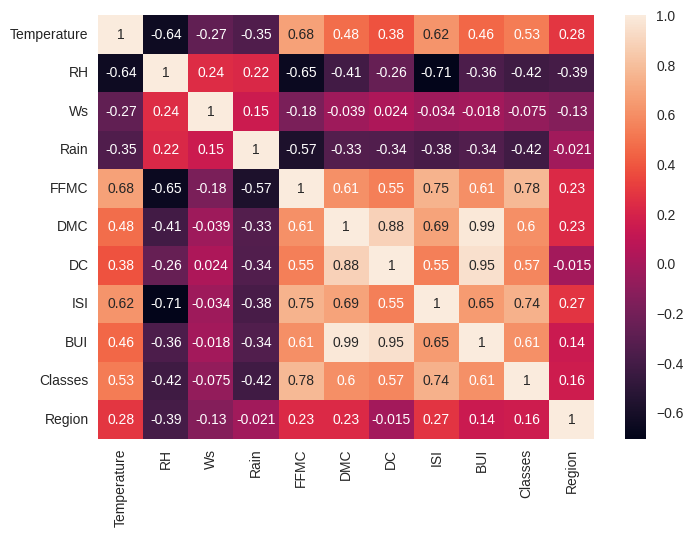

In [423]:
sns.heatmap(corr_data,annot=True)

In [424]:
## corr -> filter feature based on feature selection
def filter_features(x_train,threshold):
  corr_data=x_train.corr()
  cols=corr_data.columns
  remove_cols=set()

  for i in range(len(cols)):
    for j in range(i+1,len(cols)):
      if abs(corr_data.iloc[i,j])>threshold:
        remove_cols.add(cols[j])
  return list(remove_cols)

In [425]:
drop_cols=filter_features(x_train,0.80)
drop_cols

['DC', 'BUI']

In [426]:
## drop feature
x_train.drop(drop_cols,axis=1,inplace=True)
x_test.drop(drop_cols,axis=1,inplace=True)

print(x_train.shape,x_test.shape)

(194, 9) (49, 9)


In [427]:
## Feature Scaling ->  StandardScaler
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test)

{'whiskers': [<matplotlib.lines.Line2D at 0x7afb3e04fcb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7afb3e084050>,
 'boxes': [<matplotlib.lines.Line2D at 0x7afb3e04fa70>,
 'medians': [<matplotlib.lines.Line2D at 0x7afb3e084590>,
 'fliers': [<matplotlib.lines.Line2D at 0x7afb3e084860>,
 'means': []}

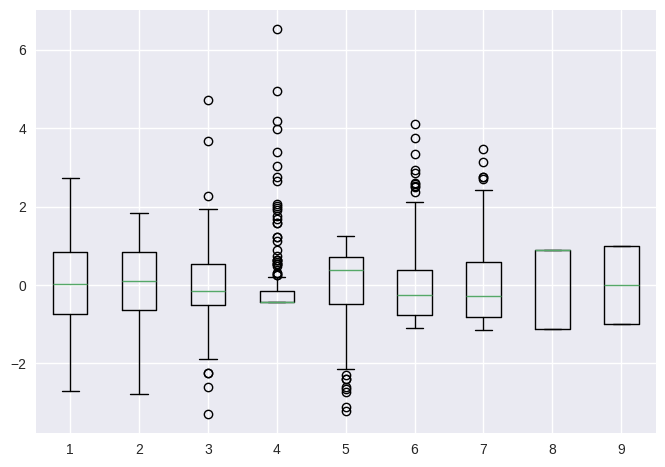

In [428]:
plt.boxplot(x_train)

In [429]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
efs=EFS(lr,max_features=9,print_progress=True,scoring='r2',cv=5,n_jobs=-1)
model=efs.fit(x_train,y_train)



Features: 511/511

In [430]:
print(model.best_score_)
print(model.best_feature_names_)

0.9862063993154321
('0', '4', '5', '6', '7', '8')


In [431]:
all_scores=pd.DataFrame(model.subsets_).T.set_index('feature_names')
all_scores

,feature_idx,cv_scores,avg_score
feature_names,,,
"(0,)","(0,)","[0.30250347059015326, 0.2669235141575267, 0.33...",0.265154
"(1,)","(1,)","[0.39531900470025993, 0.3040492112280302, 0.40...",0.298267
"(2,)","(2,)","[-0.03492821500767107, -0.014828278265118566, ...",-0.105776
"(3,)","(3,)","[0.07590385823912416, 0.11425474410552772, 0.1...",0.067186
"(4,)","(4,)","[0.49566892137714647, 0.4386703806553769, 0.45...",0.444684
...,...,...,...
"(0, 1, 2, 4, 5, 6, 7, 8)","(0, 1, 2, 4, 5, 6, 7, 8)","[0.9792020709353254, 0.9910508925170054, 0.985...",0.985793
"(0, 1, 3, 4, 5, 6, 7, 8)","(0, 1, 3, 4, 5, 6, 7, 8)","[0.9787733926208704, 0.9911342668548107, 0.985...",0.985935
"(0, 2, 3, 4, 5, 6, 7, 8)","(0, 2, 3, 4, 5, 6, 7, 8)","[0.9786390301844636, 0.9912165455097455, 0.985...",0.985904


In [432]:
x_train=model.transform(x_train)
x_test=model.transform(x_test)
print(x_train.shape,x_test.shape)

(194, 6) (49, 6)


# Linear Regression Model

r2 ->  0.9104429965171552
MAE ->  0.9021616051516527
RMSE ->  2.2937321684320815


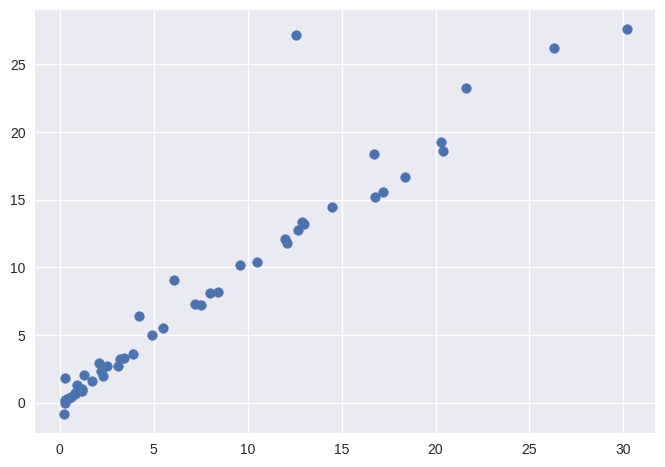

In [433]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,root_mean_squared_error


lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

print("r2 -> ",r2_score(y_test,y_pred))
print("MAE -> ",mean_absolute_error(y_test,y_pred))
print("RMSE -> ",root_mean_squared_error(y_test,y_pred))

plt.scatter(y_test,y_pred)


# Ridge Regression Model

r2 ->  0.9123573894964765
MAE ->  0.9003642731394124
RMSE ->  2.2690840385242197
Best Alpha ->  1.0


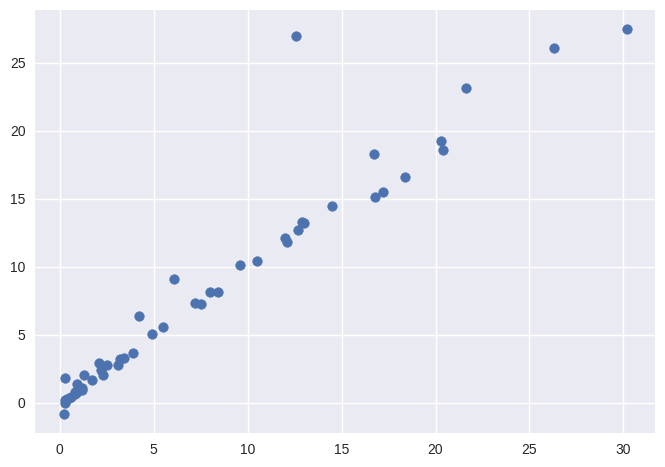

In [434]:
from sklearn.linear_model import RidgeCV

lr=RidgeCV(cv=10)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

print("r2 -> ",r2_score(y_test,y_pred))
print("MAE -> ",mean_absolute_error(y_test,y_pred))
print("RMSE -> ",root_mean_squared_error(y_test,y_pred))
print("Best Alpha -> ",lr.alpha_)

plt.scatter(y_test,y_pred)

# Lasso Regression Model

r2 ->  0.9108012820359515
MAE ->  0.8989885225492175
RMSE ->  2.2891393695488644
Best Alpha ->  0.006874893282980844
all alphas -> [6.87489328 6.41154849 5.97943158 5.5764379  5.20060465 4.8501013
 4.52322071 4.21837077 3.9340667  3.66892377 3.42165059 3.19104279
 2.97597719 2.77540628 2.58835319 2.41390685 2.2512176  2.09949307
 1.95799427 1.82603201 1.70296356 1.58818952 1.48115086 1.38132625
 1.28822948 1.20140713 1.12043631 1.04492265 0.97449836 0.90882043
 0.84756898 0.79044566 0.73717227 0.68748933 0.64115485 0.59794316
 0.55764379 0.52006046 0.48501013 0.45232207 0.42183708 0.39340667
 0.36689238 0.34216506 0.31910428 0.29759772 0.27754063 0.25883532
 0.24139068 0.22512176 0.20994931 0.19579943 0.1826032  0.17029636
 0.15881895 0.14811509 0.13813262 0.12882295 0.12014071 0.11204363
 0.10449226 0.09744984 0.09088204 0.0847569  0.07904457 0.07371723
 0.06874893 0.06411548 0.05979432 0.05576438 0.05200605 0.04850101
 0.04523221 0.04218371 0.03934067 0.03668924 0.03421651 0.03191043

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:1664: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


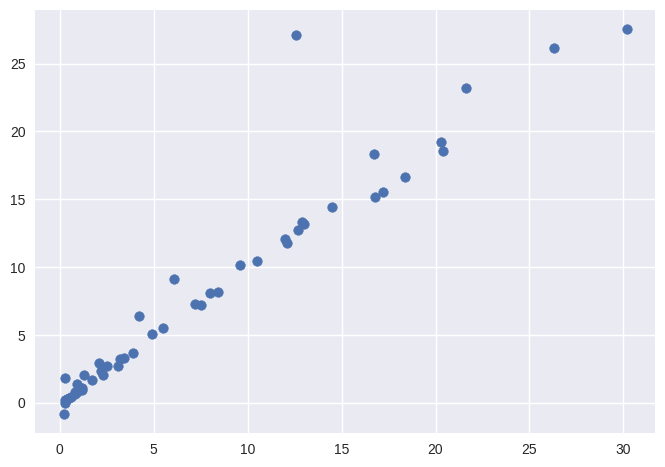

In [435]:
from sklearn.linear_model import LassoCV

lr=LassoCV(cv=10)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

print("r2 -> ",r2_score(y_test,y_pred))
print("MAE -> ",mean_absolute_error(y_test,y_pred))
print("RMSE -> ",root_mean_squared_error(y_test,y_pred))
print("Best Alpha -> ",lr.alpha_)
print('all alphas ->',lr.alphas_)

plt.scatter(y_test,y_pred)

# ElasticNet Regression Model

r2 ->  0.913252935636868
MAE ->  0.8975396624915553
RMSE ->  2.257461340755892
Best Alpha ->  0.013749786565961687


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:1664: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


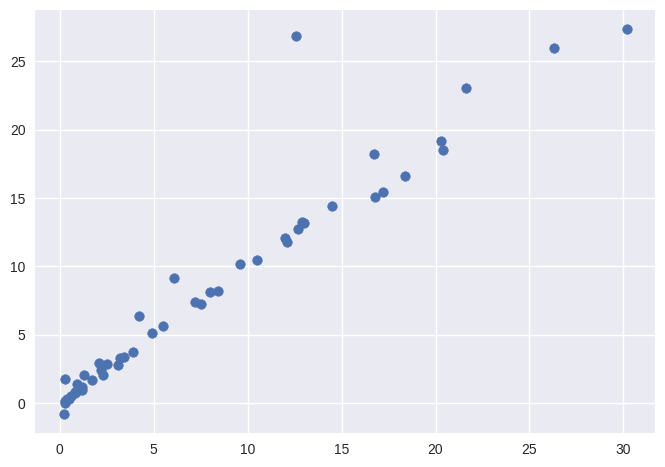

In [436]:
from sklearn.linear_model import ElasticNetCV

lr=ElasticNetCV(cv=10)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

print("r2 -> ",r2_score(y_test,y_pred))
print("MAE -> ",mean_absolute_error(y_test,y_pred))
print("RMSE -> ",root_mean_squared_error(y_test,y_pred))
print("Best Alpha -> ",lr.alpha_)

plt.scatter(y_test,y_pred)